In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import librosa
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report
import pickle
import os
from pydub import AudioSegment
from collections import Counter

## Loading data

In [2]:
train_df = pd.read_csv("merged_train.csv")
test_df = pd.read_csv("merged_test.csv")

In [3]:
train_df['label'].value_counts()

label
rock                       5894
pop                        5146
classical                  5111
ambient                    2000
dnb                        2000
house                      2000
phonk                      2000
hardstyle                  2000
lofi                       2000
techno                     2000
moombahton_reggaeton       2000
psytrance                  2000
hardcore                   2000
future_garage_wave_trap    2000
big_room_house             2000
dubstep                    2000
trap                       2000
trance                     2000
synthwave                  2000
Name: count, dtype: int64

In [4]:
def balance_subset(subset_df, max_count):
    return subset_df.groupby('label').apply(lambda x: x.sample(min(len(x), max_count), random_state=42)).reset_index(drop=True)

# Так как из-за новых данных происходит дисбаланс классов, на рандом отрежем часть данных
balanced_train_df = balance_subset(train_df, 2500)
balanced_test_df = balance_subset(test_df, 500)

C:\Users\szabu\AppData\Local\Temp\ipykernel_22112\1516283524.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return subset_df.groupby('label').apply(lambda x: x.sample(min(len(x), max_count), random_state=42)).reset_index(drop=True)
C:\Users\szabu\AppData\Local\Temp\ipykernel_22112\1516283524.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return subset_df.groupby('label').apply(lambda x: x.sample(m

In [5]:
X_train = balanced_train_df.drop(columns=['label'])
y_train = balanced_train_df['label']

X_test = balanced_test_df.drop(columns=['label'])
y_test = balanced_test_df['label']

In [15]:
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42)),
    'Random Forest': RandomForestClassifier(n_estimators=70, random_state=42),
    'CatBoost': CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=5, silent=False, random_state=42),
    'SVM': make_pipeline(StandardScaler(), SVC(probability=True, max_iter=2500,random_state=42)),
    'Naive Bayes': GaussianNB()
}

In [7]:
def train_and_show_report(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    print(classification_report(y_test, y_pred, target_names=y_train.unique()))
    
    cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
    
    sns.heatmap(pd.DataFrame(cm, columns=y_train.unique(), index=y_train.unique()))
    plt.show()

## Tuning catboost

0:	learn: 2.7977371	total: 579ms	remaining: 28m 56s
1:	learn: 2.6949660	total: 773ms	remaining: 19m 18s
2:	learn: 2.6047642	total: 894ms	remaining: 14m 52s
3:	learn: 2.5288230	total: 979ms	remaining: 12m 13s
4:	learn: 2.4464090	total: 1.09s	remaining: 10m 56s
5:	learn: 2.3741416	total: 1.18s	remaining: 9m 50s
6:	learn: 2.3172032	total: 1.26s	remaining: 9m
7:	learn: 2.2562848	total: 1.36s	remaining: 8m 27s
8:	learn: 2.2122793	total: 1.43s	remaining: 7m 56s
9:	learn: 2.1650359	total: 1.51s	remaining: 7m 32s
10:	learn: 2.1146569	total: 1.61s	remaining: 7m 17s
11:	learn: 2.0764244	total: 1.69s	remaining: 6m 59s
12:	learn: 2.0415584	total: 1.76s	remaining: 6m 45s
13:	learn: 2.0011801	total: 1.85s	remaining: 6m 34s
14:	learn: 1.9686412	total: 1.94s	remaining: 6m 25s
15:	learn: 1.9413339	total: 2.02s	remaining: 6m 15s
16:	learn: 1.9069840	total: 2.1s	remaining: 6m 8s
17:	learn: 1.8758904	total: 2.19s	remaining: 6m 2s
18:	learn: 1.8482154	total: 2.27s	remaining: 5m 56s
19:	learn: 1.8173802	tot

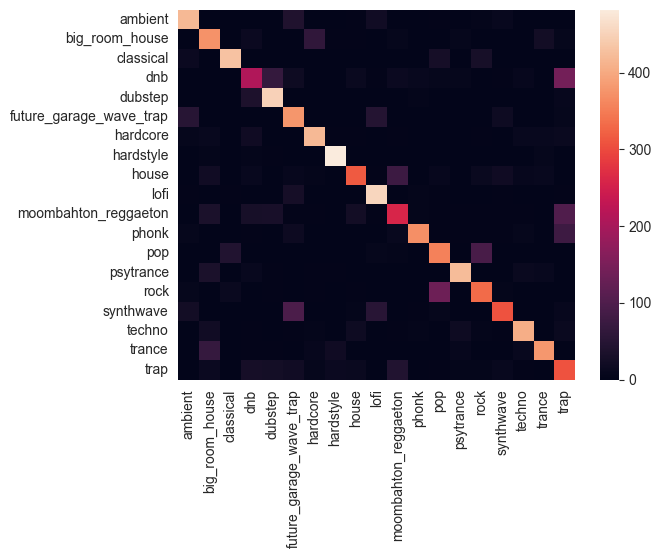

In [8]:
model_1 = CatBoostClassifier(iterations=3000, learning_rate=0.05, depth=5, silent=False, random_state=42)
train_and_show_report(model_1)

0:	learn: 2.4062114	total: 33.4ms	remaining: 33.4s
1:	learn: 2.1609782	total: 63.8ms	remaining: 31.8s
2:	learn: 1.9832589	total: 95ms	remaining: 31.6s
3:	learn: 1.8501470	total: 125ms	remaining: 31.2s
4:	learn: 1.7369446	total: 155ms	remaining: 30.9s
5:	learn: 1.6435166	total: 186ms	remaining: 30.9s
6:	learn: 1.5605184	total: 218ms	remaining: 30.9s
7:	learn: 1.4821321	total: 248ms	remaining: 30.8s
8:	learn: 1.4138894	total: 277ms	remaining: 30.5s
9:	learn: 1.3506302	total: 305ms	remaining: 30.2s
10:	learn: 1.2951792	total: 333ms	remaining: 29.9s
11:	learn: 1.2445574	total: 360ms	remaining: 29.6s
12:	learn: 1.1903607	total: 387ms	remaining: 29.4s
13:	learn: 1.1421103	total: 415ms	remaining: 29.3s
14:	learn: 1.1014305	total: 444ms	remaining: 29.2s
15:	learn: 1.0644229	total: 472ms	remaining: 29s
16:	learn: 1.0268539	total: 501ms	remaining: 29s
17:	learn: 0.9907873	total: 529ms	remaining: 28.9s
18:	learn: 0.9609750	total: 556ms	remaining: 28.7s
19:	learn: 0.9345757	total: 584ms	remaining:

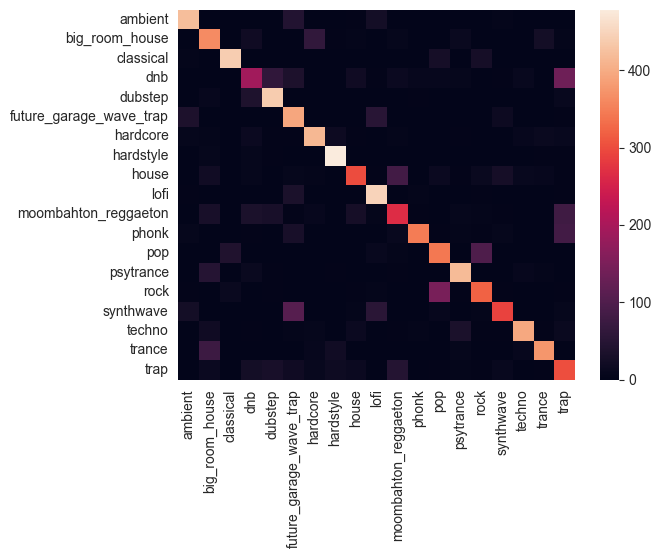

In [14]:
model_2 = CatBoostClassifier(learning_rate=0.1, depth=7, silent=False, random_state=42, grow_policy="Depthwise", task_type="GPU")
train_and_show_report(model_2)

In [ ]:
model_2 = CatBoostClassifier(iterations=1500, learning_rate=0.1, depth=7, silent=False, random_state=42, grow_policy="Depthwise", task_type="GPU")
train_and_show_report(model_2)

0:	learn: 2.1495089	total: 86.7ms	remaining: 1m 26s
1:	learn: 1.8657124	total: 165ms	remaining: 1m 22s
2:	learn: 1.6833426	total: 259ms	remaining: 1m 26s
3:	learn: 1.5523430	total: 347ms	remaining: 1m 26s
4:	learn: 1.4377178	total: 420ms	remaining: 1m 23s
5:	learn: 1.3374378	total: 505ms	remaining: 1m 23s
6:	learn: 1.2604190	total: 594ms	remaining: 1m 24s
7:	learn: 1.1919108	total: 679ms	remaining: 1m 24s
8:	learn: 1.1250174	total: 773ms	remaining: 1m 25s
9:	learn: 1.0726420	total: 862ms	remaining: 1m 25s
10:	learn: 1.0238845	total: 958ms	remaining: 1m 26s
11:	learn: 0.9770104	total: 1.05s	remaining: 1m 26s
12:	learn: 0.9347881	total: 1.14s	remaining: 1m 26s
13:	learn: 0.8995193	total: 1.23s	remaining: 1m 26s
14:	learn: 0.8658038	total: 1.33s	remaining: 1m 27s
15:	learn: 0.8322348	total: 1.43s	remaining: 1m 28s
16:	learn: 0.8023195	total: 1.53s	remaining: 1m 28s
17:	learn: 0.7761166	total: 1.63s	remaining: 1m 29s
18:	learn: 0.7533289	total: 1.73s	remaining: 1m 29s
19:	learn: 0.7326042	

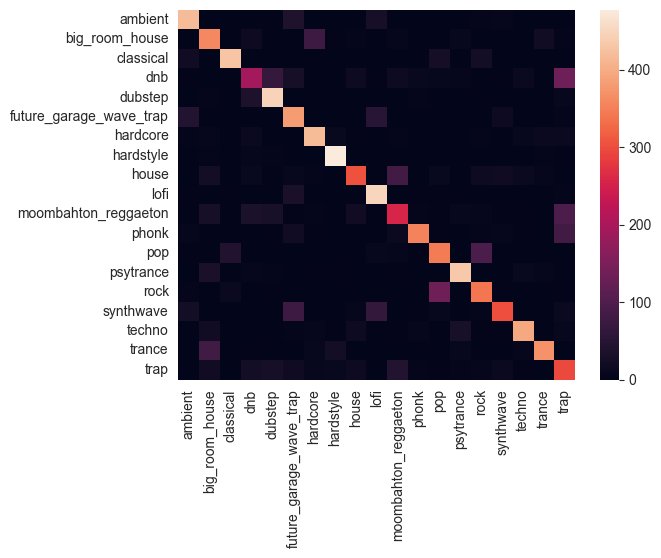

In [13]:
model_1 = CatBoostClassifier(learning_rate=0.1, depth=9, silent=False, random_state=42, task_type="GPU")
train_and_show_report(model_1)

In [19]:
dict(zip(X_train.columns, model_2.get_feature_importance()))

{'rmse_mean': 7.0070497164458905,
 'rmse_std': 1.82090219272954,
 'spectral_centroid_mean': 2.162047321997601,
 'spectral_centroid_std': 1.812611634604856,
 'spectral_bandwidth_mean': 1.073070193921004,
 'spectral_bandwidth_std': 0.7212817931533022,
 'rolloff_mean': 1.7806294128201963,
 'rolloff_std': 0.464687427150562,
 'zero_crossing_rate_mean': 1.0676120104304812,
 'zero_crossing_rate_std': 0.8115227403801193,
 'mfcc1_mean': 3.941013005300509,
 'mfcc1_std': 1.2799048007441236,
 'mfcc2_mean': 3.8581199929833616,
 'mfcc2_std': 1.495213245187956,
 'mfcc3_mean': 1.5707162426231376,
 'mfcc3_std': 1.9461577540549488,
 'mfcc4_mean': 1.7875018591017127,
 'mfcc4_std': 0.8014228914857233,
 'mfcc5_mean': 1.6631684186275058,
 'mfcc5_std': 0.4657504046740895,
 'mfcc6_mean': 2.1432598123157405,
 'mfcc6_std': 0.24882680325131143,
 'mfcc7_mean': 0.761202305270609,
 'mfcc7_std': 0.7600218194106411,
 'mfcc8_mean': 1.005602733251162,
 'mfcc8_std': 0.6510141775651246,
 'mfcc9_mean': 0.5152619431415855,